In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("dataset/house-votes-84.csv")

In [3]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


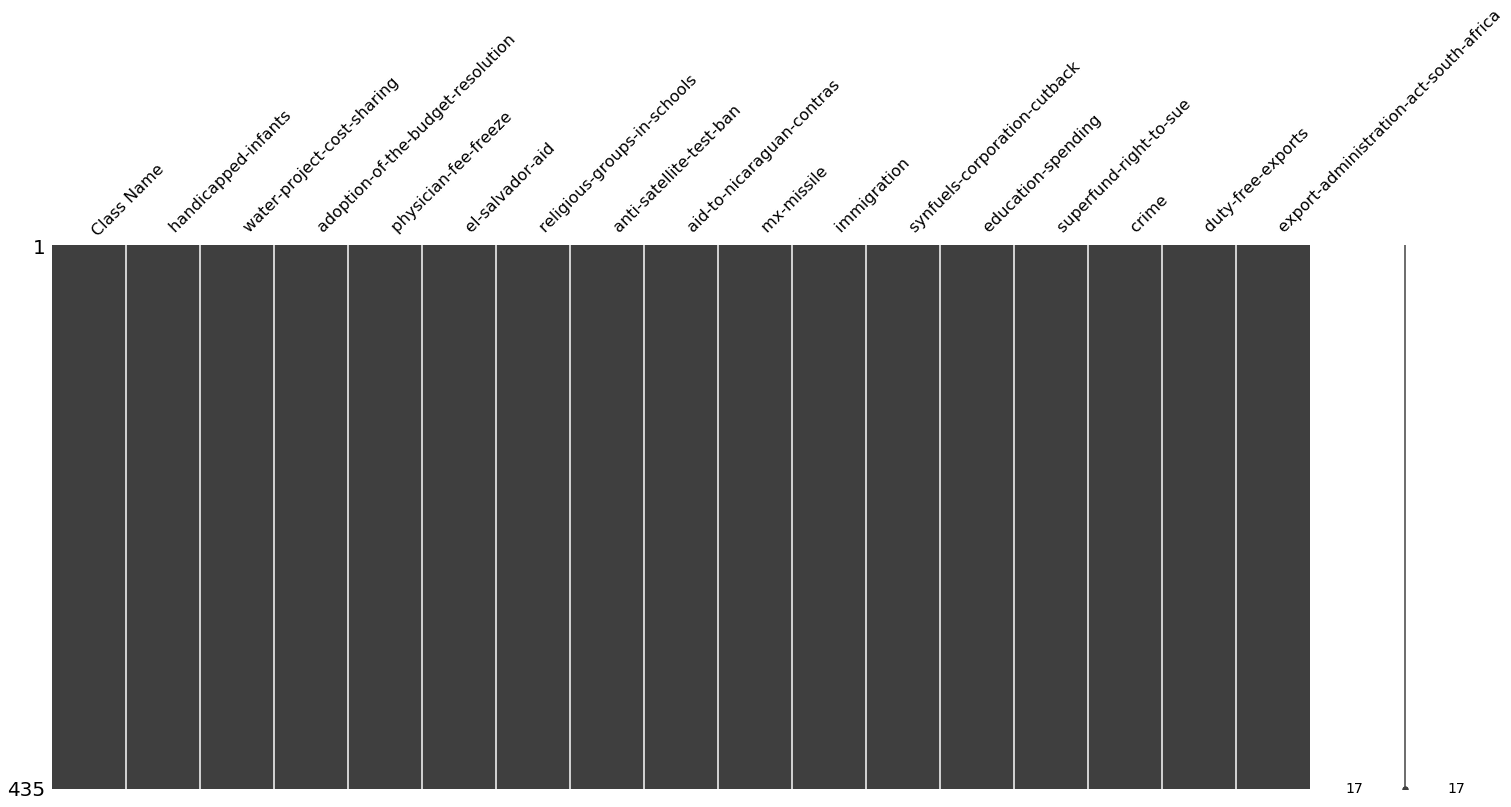

In [4]:
msno.matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class Name                                 435 non-null object
 handicapped-infants                       435 non-null object
 water-project-cost-sharing                435 non-null object
 adoption-of-the-budget-resolution         435 non-null object
 physician-fee-freeze                      435 non-null object
 el-salvador-aid                           435 non-null object
 religious-groups-in-schools               435 non-null object
 anti-satellite-test-ban                   435 non-null object
 aid-to-nicaraguan-contras                 435 non-null object
 mx-missile                                435 non-null object
 immigration                               435 non-null object
 synfuels-corporation-cutback              435 non-null object
 education-spending                        435 non-null object
 superfund-right-to-sue                    435 non-null object
 crime       

In [6]:
df.dtypes

Class Name                                 object
 handicapped-infants                       object
 water-project-cost-sharing                object
 adoption-of-the-budget-resolution         object
 physician-fee-freeze                      object
 el-salvador-aid                           object
 religious-groups-in-schools               object
 anti-satellite-test-ban                   object
 aid-to-nicaraguan-contras                 object
 mx-missile                                object
 immigration                               object
 synfuels-corporation-cutback              object
 education-spending                        object
 superfund-right-to-sue                    object
 crime                                     object
 duty-free-exports                         object
 export-administration-act-south-africa    object
dtype: object

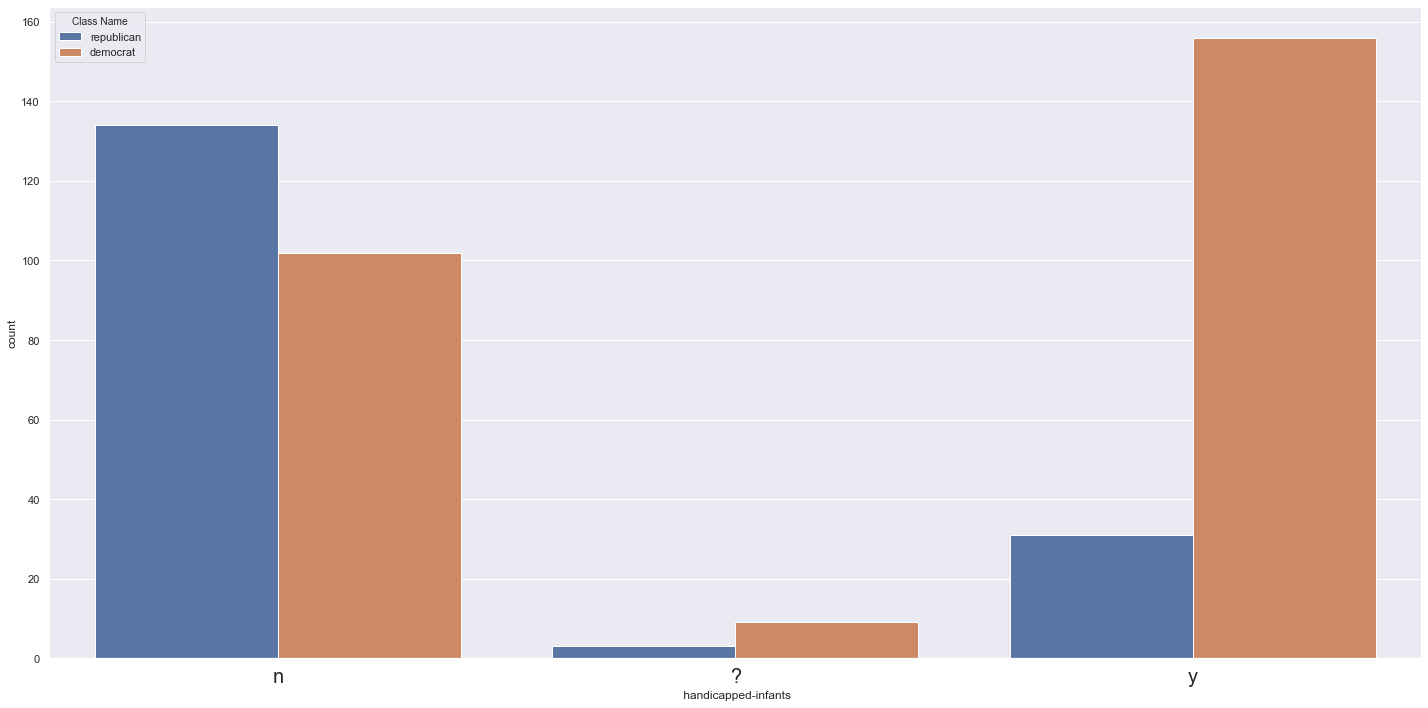

In [7]:
plt.figure(figsize = (20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x=' handicapped-infants',hue='Class Name',data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 20)
plt.tight_layout()

In [8]:
df = df.replace('?', np.nan)

In [9]:
df = df.replace('y', 1)
df = df.replace('n', 0)

In [10]:
df.dropna(inplace=True)

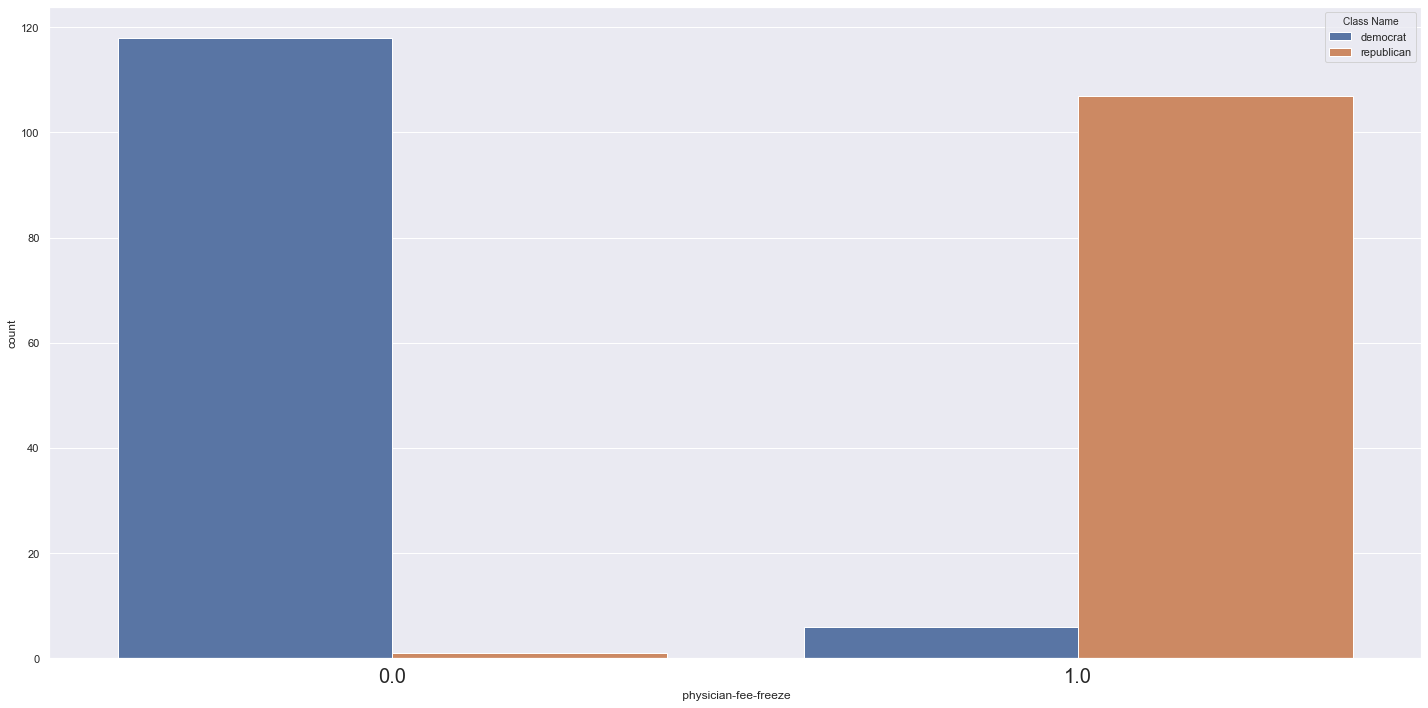

In [11]:
plt.figure(figsize = (20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x=' physician-fee-freeze',hue='Class Name',data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 20)
plt.tight_layout()

In [26]:
X = df.iloc[:, 1:16].values
y = df.iloc[:, 0].values

In [27]:
X

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [28]:
y

array(['democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'democrat', 'republican', 'democrat', 'republican', 'republican',
       'republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'republican', 'republican',
       'republican', 'republican', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'democrat', 'republican', 'republican',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'republican', 'democrat', 'republican', 'republican',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'republican', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'republican', 'democrat', 'republican', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'republican'

In [29]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [33]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.19% (3.94%)
